In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')

In [2]:
"""
Customer Churn Analysis – Telecom Dataset

Objective:
To analyze telecom customer data and identify key factors
influencing customer churn using exploratory data analysis.
"""

'\nCustomer Churn Analysis – Telecom Dataset\n\nObjective:\nTo analyze telecom customer data and identify key factors\ninfluencing customer churn using exploratory data analysis.\n'

In [3]:
df = pd.read_csv("../data/telco_churn.csv")

In [4]:
df['TotalCharges'].head(10)
df['TotalCharges'].dtype

dtype('O')

In [5]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [6]:
df['TotalCharges'].isnull().sum()

11

In [7]:
df[df['TotalCharges'].isnull()][['tenure', 'TotalCharges']]
df = df.dropna()
df.shape

(7032, 21)

In [8]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [9]:
df['TenureBand'] = pd.cut(
    df['tenure'],
    bins=[0, 12, 24, 48, 72],
    labels=['0-12', '13-24', '25-48', '49+'],
    right=True
)
df[['tenure', 'TenureBand']].head(10)
df['TenureBand'].value_counts()

49+      2239
0-12     2175
25-48    1594
13-24    1024
Name: TenureBand, dtype: int64

In [10]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

In [11]:
df.groupby('TenureBand')['Churn'].mean().sort_values(ascending=False)

TenureBand
0-12     0.476782
13-24    0.287109
25-48    0.203890
49+      0.095132
Name: Churn, dtype: float64

In [12]:
df['TenureBand'] = pd.cut(
    df['tenure'],
    bins=[-1, 12, 24, 48, 72],
    labels=['0-12', '13-24', '25-48', '49+']
)
df['TenureBand'].value_counts()

49+      2239
0-12     2175
25-48    1594
13-24    1024
Name: TenureBand, dtype: int64

In [13]:
df = df.drop(columns=['TenureBand'], errors='ignore')

In [14]:
df['TenureBand'] = pd.cut(
    df['tenure'],
    bins=[0, 12, 24, 48, 72],
    labels=['0-12', '13-24', '25-48', '49+'],
    include_lowest=True
)

In [15]:
df['TenureBand'].value_counts(dropna=False)

49+      2239
0-12     2175
25-48    1594
13-24    1024
Name: TenureBand, dtype: int64

In [16]:
df[['tenure', 'Churn', 'TenureBand']].head(15)

,tenure,Churn,TenureBand
0,1,0,0-12
1,34,0,25-48
2,2,1,0-12
3,45,0,25-48
4,2,1,0-12
5,8,1,0-12
6,22,0,13-24
7,10,0,0-12
8,28,1,25-48
9,62,0,49+


In [17]:
df['Churn'].value_counts(dropna=False)

0    5163
1    1869
Name: Churn, dtype: int64

In [18]:
# Reload dataset fresh
df_raw = pd.read_csv("../data/telco_churn.csv")

# Fix TotalCharges again (quick + safe)
df_raw['TotalCharges'] = pd.to_numeric(df_raw['TotalCharges'], errors='coerce')
df_raw = df_raw.dropna()

# Reassign cleaned churn
df['Churn'] = df_raw['Churn'].map({'Yes': 1, 'No': 0}).values
df['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [19]:
df.groupby('TenureBand')['Churn'].mean()

TenureBand
0-12     0.476782
13-24    0.287109
25-48    0.203890
49+      0.095132
Name: Churn, dtype: float64

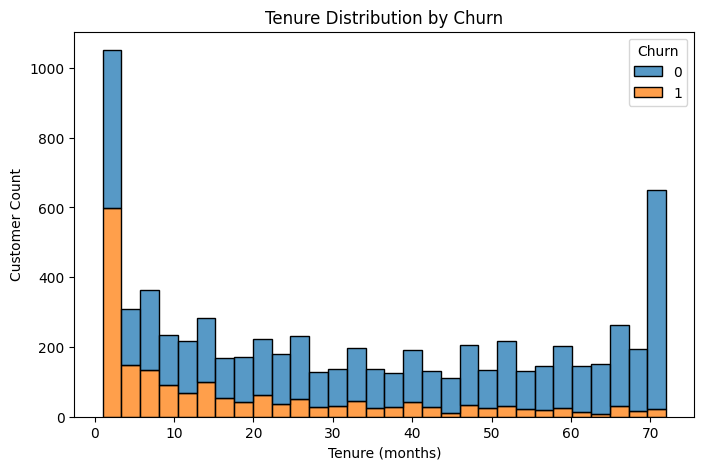

In [20]:
#data visualization part
#tenure distribution by churn
plt.figure(figsize=(8,5))
sns.histplot(
    data=df,
    x='tenure',
    hue='Churn',
    bins=30,
    multiple='stack'
)
plt.title('Tenure Distribution by Churn')
plt.xlabel('Tenure (months)')
plt.ylabel('Customer Count')
plt.show()

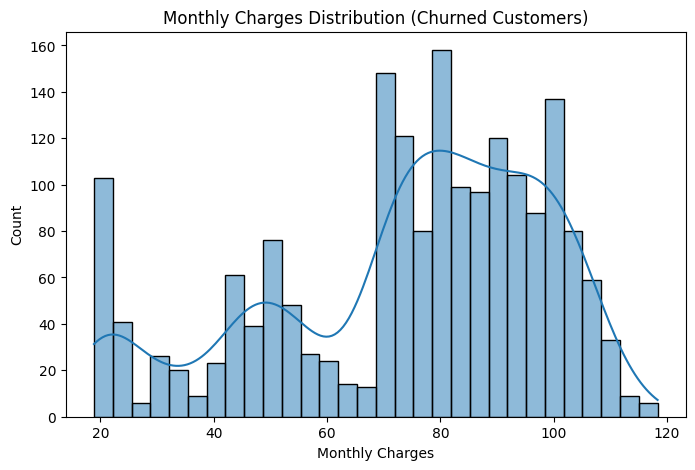

In [21]:
#monthly charges distribution of churned customers
plt.figure(figsize=(8,5))
sns.histplot(
    df[df['Churn'] == 1]['MonthlyCharges'],
    bins=30,
    kde=True
)
plt.title('Monthly Charges Distribution (Churned Customers)')
plt.xlabel('Monthly Charges')
plt.ylabel('Count')
plt.show()

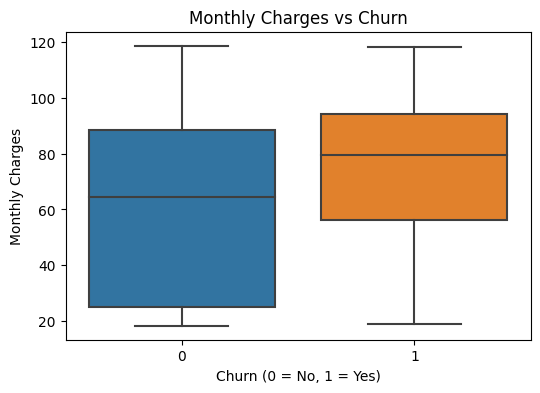

In [22]:
#monthly charges vs churn
plt.figure(figsize=(6,4))
sns.boxplot(
    data=df,
    x='Churn',
    y='MonthlyCharges'
)
plt.title('Monthly Charges vs Churn')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Monthly Charges')
plt.show()

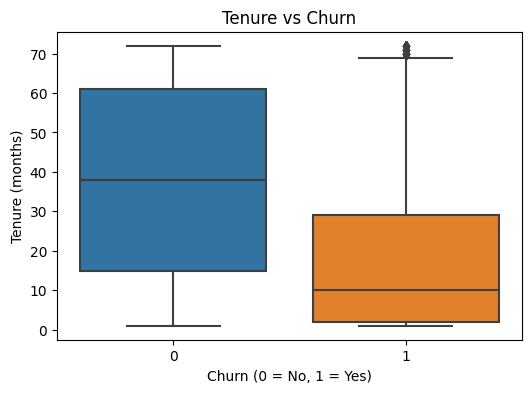

In [23]:
#tenure vs churn
plt.figure(figsize=(6,4))
sns.boxplot(
    data=df,
    x='Churn',
    y='tenure'
)
plt.title('Tenure vs Churn')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Tenure (months)')
plt.show()

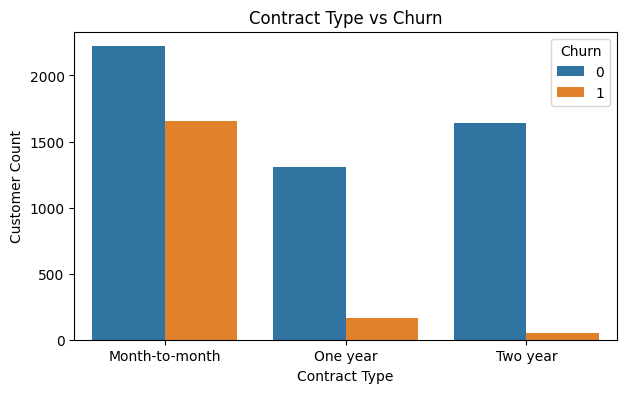

In [24]:
#count plot of contract type vs churn
plt.figure(figsize=(7,4))
sns.countplot(
    data=df,
    x='Contract',
    hue='Churn'
)
plt.title('Contract Type vs Churn')
plt.xlabel('Contract Type')
plt.ylabel('Customer Count')
plt.show()

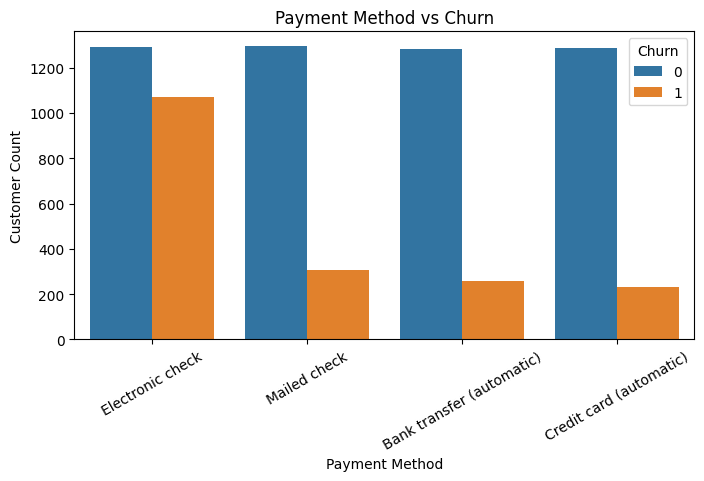

In [25]:
#counter plot of payment method vs churn
plt.figure(figsize=(8,4))
sns.countplot(
    data=df,
    x='PaymentMethod',
    hue='Churn'
)
plt.title('Payment Method vs Churn')
plt.xlabel('Payment Method')
plt.ylabel('Customer Count')
plt.xticks(rotation=30)
plt.show()

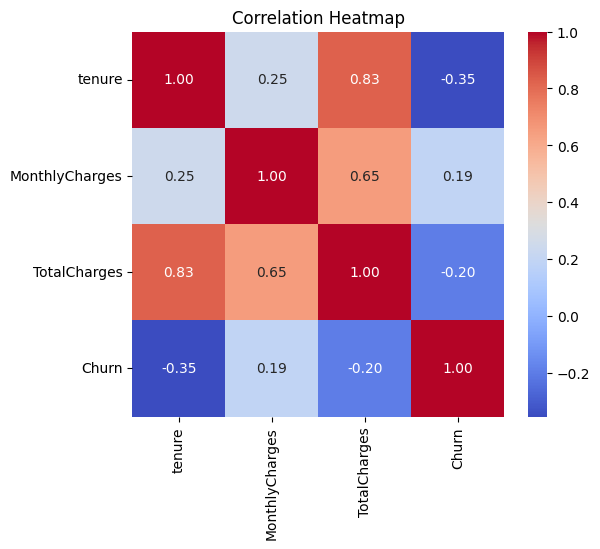

In [26]:
#correlation heatmap
plt.figure(figsize=(6,5))
corr = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']].corr()

sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    fmt='.2f'
)
plt.title('Correlation Heatmap')
plt.show()

In [27]:
tenure_churn = df.groupby('TenureBand')['Churn'].mean().to_frame()

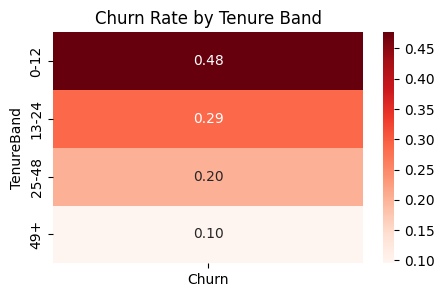

In [28]:
plt.figure(figsize=(5,3))
sns.heatmap(
    tenure_churn,
    annot=True,
    cmap='Reds',
    fmt='.2f'
)
plt.title('Churn Rate by Tenure Band')
plt.show()

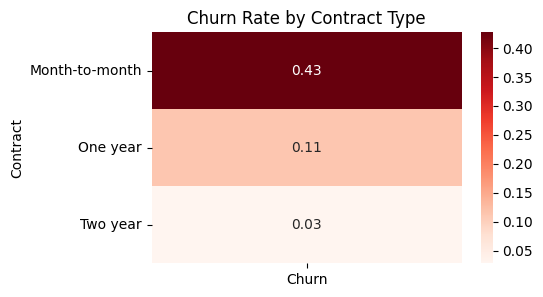

In [29]:
contract_churn = df.groupby('Contract')['Churn'].mean().to_frame()
plt.figure(figsize=(5,3))
sns.heatmap(
    contract_churn,
    annot=True,
    cmap='Reds',
    fmt='.2f'
)
plt.title('Churn Rate by Contract Type')
plt.show()

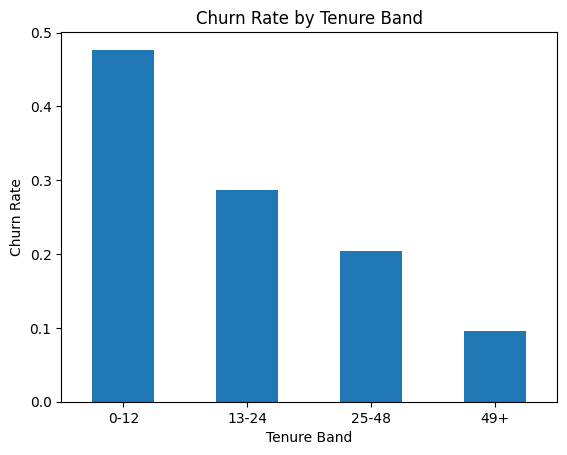

In [30]:
#bar plot
tenure_churn.plot(kind='bar', legend=False)
plt.title('Churn Rate by Tenure Band')
plt.xlabel('Tenure Band')
plt.ylabel('Churn Rate')
plt.xticks(rotation=0)
plt.show()

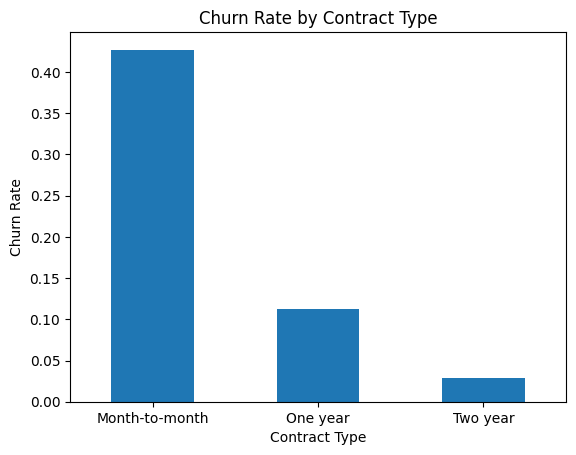

In [31]:
df.groupby('Contract')['Churn'].mean().sort_values(ascending=False).plot(
    kind='bar'
)
plt.title('Churn Rate by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate')
plt.xticks(rotation=0)
plt.show()

Key Insights:

- Customer churn is highest during the early stages of the customer lifecycle.
  Customers with tenure between 0–12 months show a churn rate of approximately 48%.

- Contract type has a strong impact on churn behavior.
  Month-to-month customers exhibit significantly higher churn compared to one-year
  and two-year contract customers.

- Monthly charges are positively associated with churn.
  Customers with higher monthly bills are more likely to discontinue the service.

- Long-term customers (tenure > 48 months) demonstrate strong retention,
  indicating tenure as a key retention driver.